# FINAL PROJECT 2: Logistic Regression dan Support Vector Machine

NATHANIA GUNAWAN        (PYTN-KS09-006) <BR>
ABDUL AZIS              (PYTN-KS09-009) <BR>
Berlian Safri Prakoso   (PYTN-KS09-016)

## <font color=#FF7913>A. Perkenalan

Dataset ini berisi tentang pengamatan cuaca harian dari banyak lokasi di seluruh Australia selama 10 tahun. Tujuan dari pengamatan data ini adalah memprediksi variabel RainTomorrow atau dapat dikatakan untuk memprediksi apakah terjadi hujan 1mm atau lebih pada esok hari. Dengan menerapkan metode Logistic Regression dan Support Vector Machine, data ini akan menjadi bahan prediksi terjadinya hujan pada esok hari.

Dalam dataset ini, terdapat banyak lokasi di Australia. Akan tetapi, dalam analisis ini kita akan fokus pada 1 lokasi saja yang sering terjadi hujan.

## <font color=#FF7913>B.Import Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.available
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## <font color=#FF7913>C. Data Loading

### <font color=#6C88C4> Read Dataframe

In [2]:
df = pd.read_csv('F:/KULIAH UNS/MBKM/hacktiv8/dataset/Rain in Australia/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### <font color=#6C88C4> General Info of Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

yang perlu diperhatikan dari output diatas, terlihat bahwa kolom "date" masih bertipe object sehingga perlu dilakukan konversi tipe data menjadi datetime.

In [4]:
df.shape

(145460, 23)

dari output diatas, terlihat bahwa data ini berjumlah 145460 baris dan 23 kolom. lalu, akan dilanjutkan untuk melihat tipe data pada kolom.

In [5]:
df.dtypes.value_counts()

float64    16
object      7
dtype: int64

General information of the data:
1. 16 kolom data float64
2. 7 kolom data object

**Mengubah Tipe Data Date**

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# check if date column is datetime
df['Date'].dtype

dtype('<M8[ns]')

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### <font color=#6C88C4> Checking Duplicate Data

In [9]:
# mengecek jumlah data duplikat
df.duplicated().sum()

0

Tidak terdapat data yang duplikat

## <font color=#FF7913>D. Data Cleaning

**Checking Null Values, Filling Missing Data**

In [10]:
missing = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(df)).round(2)*100
missing

,No. of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


Kolom evaporation, sunshine, cloud9am, dan cloud3pm memiliki missing values yang sangat banyak (30% - 40%). Akan tetapi, missing values pada dataframe ini tidak diremove terlebih dahulu karena akan dipilih 1 lokasi saja yang dianalisis dengan RainToday terbanyak.

## <font color=#FF7913>E. Explorasi Data 

### <font color=#6C88C4> Lokasi dan Terjadinya Hujan

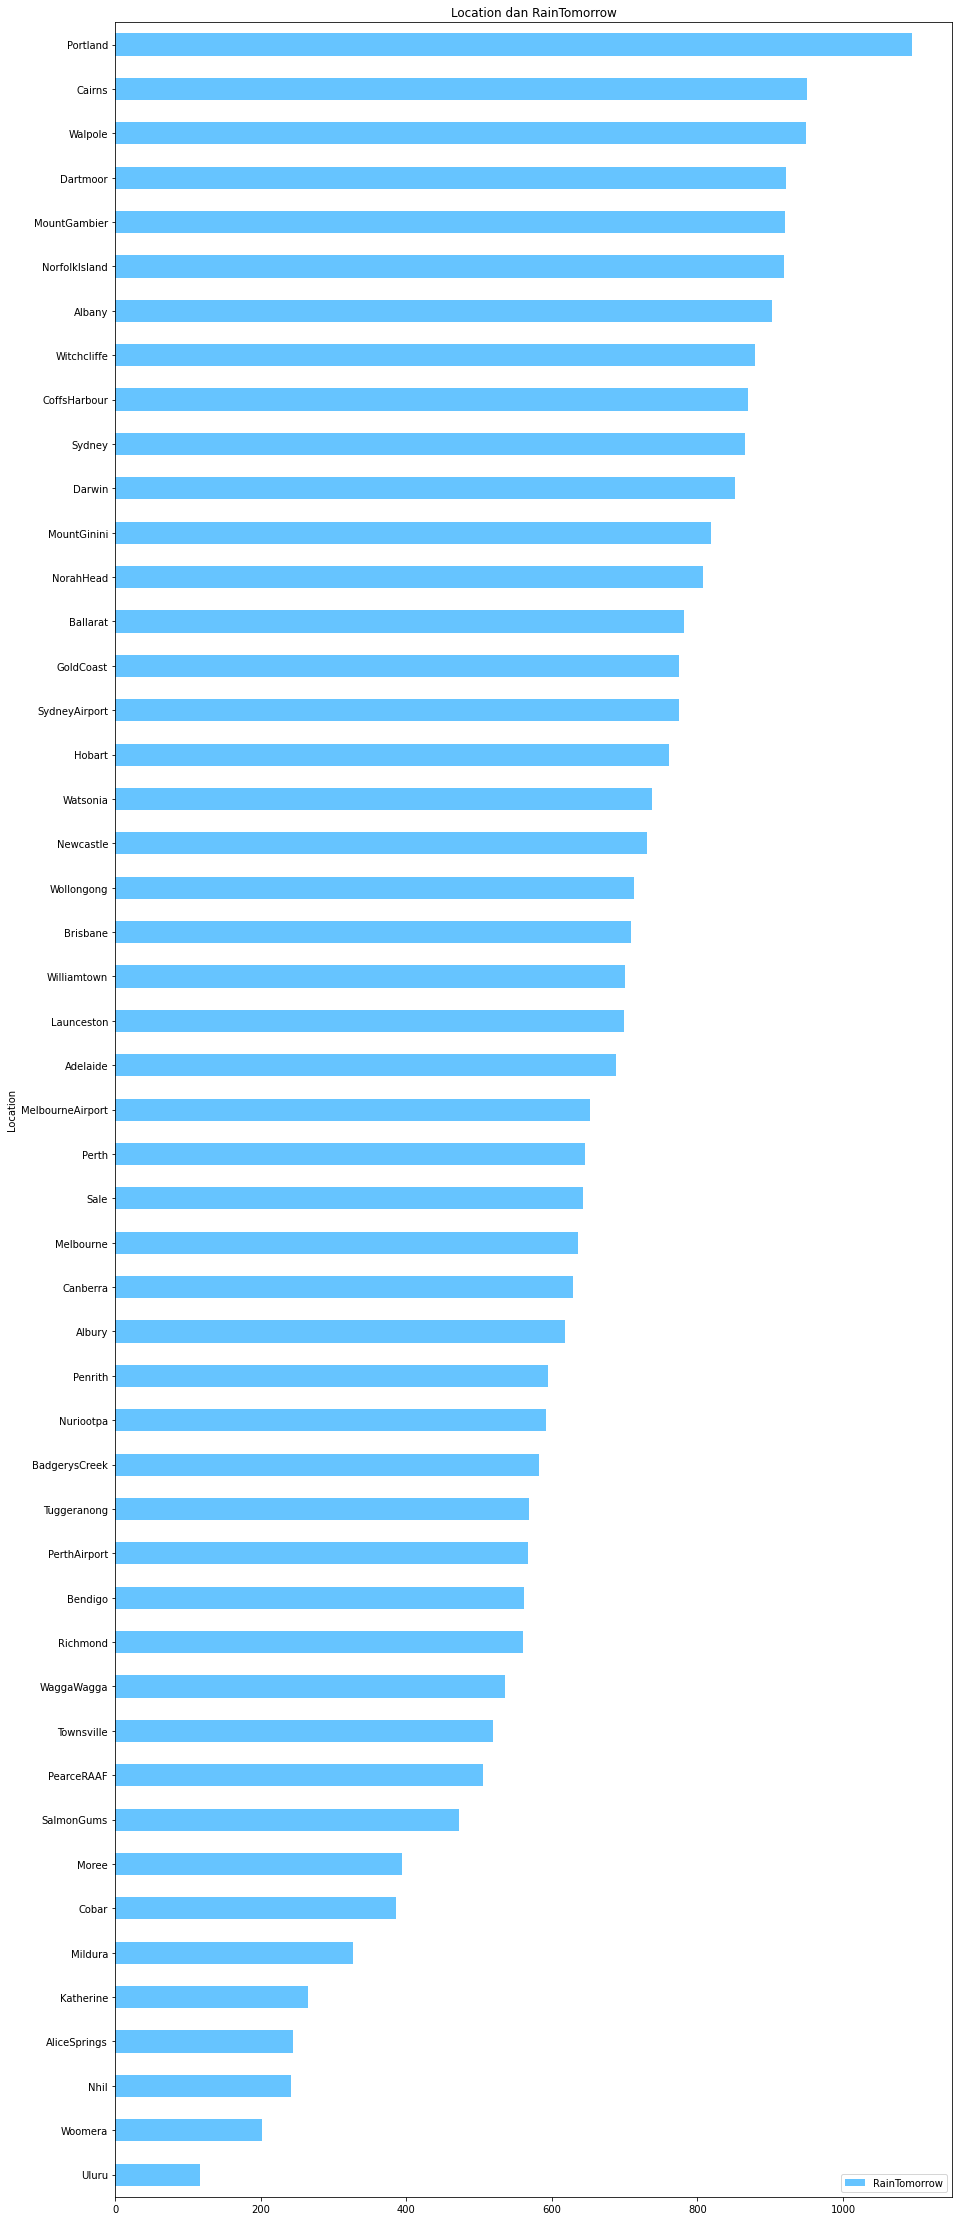

In [11]:
dv1 = df[(df['RainTomorrow']=='Yes')]
barh = dv1.groupby(['Location'],as_index=True).agg({'RainTomorrow':'count'}, index=False).sort_values(by='RainTomorrow').plot.barh(rot=0,title="Location dan RainTomorrow", color=['#009dff'],figsize=(15,40),alpha=0.6)
style.use('seaborn-paper') #sets the size of the charts
style.use('ggplot')

**Location dengan jumlah RainTomorrow terbanyak adalah Portland, karena itu data yang akan digunakan untuk analisis selanjutnya adalah data di Portland saja.**

***

**1. Membuat dataframe khusus Portland**

In [13]:
df1 = df[(df['Location']=='Portland')]
df1.drop(['Location'],axis=1,inplace=True)
df1.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
74980,2009-01-01,12.5,16.6,0.0,4.8,6.5,SW,59.0,SW,SW,...,97.0,99.0,1006.7,1010.5,NaN,6.0,13.7,14.5,No,Yes
74981,2009-01-02,8.6,15.2,1.6,4.8,11.7,SSW,39.0,SW,S,...,60.0,61.0,1020.0,1021.3,6.0,2.0,11.9,14.0,Yes,No
74982,2009-01-03,1.6,18.0,0.2,4.6,11.9,S,30.0,NE,ESE,...,67.0,52.0,1020.4,1018.3,6.0,3.0,11.6,17.5,No,No
74983,2009-01-04,4.8,20.1,0.0,4.8,13.8,S,28.0,E,S,...,73.0,63.0,1016.4,1015.2,1.0,1.0,14.7,18.1,No,No
74984,2009-01-05,4.4,18.8,0.0,5.6,13.6,W,46.0,W,W,...,72.0,68.0,1014.0,1013.4,4.0,3.0,14.9,18.0,No,No


Terdapat total 3009 data dari Portland

**2. Checking Null Values**

In [14]:
missing = pd.DataFrame(df1.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(df1)).round(2)*100
missing

,No. of missing values,% missing_values
Date,0,0.0
MinTemp,9,0.0
MaxTemp,1,0.0
Rainfall,13,0.0
Evaporation,409,14.0
Sunshine,443,15.0
WindGustDir,35,1.0
WindGustSpeed,35,1.0
WindDir9am,70,2.0
WindDir3pm,5,0.0


Insights:
1. Kolom WindGustDir,WindDir9am, dan WindDir3pm tidak akan digunakan dalam analisis sehingga akan didrop
2. Kolom WindGustSpeed, Humidity9am akan didrop missing valuesnya karena < 10%
3. Kolom Evaporation, Sunshine, Cloud9am, dan Cloud3pm akan difill missing valuesnya karena > 10%
4. Terakhir, dataset akan didropna untuk memastikan tidak ada lagi sisa missing values

**3. Process Missing Data**

- Drop kolom WindGustDir,WindDir9am, dan WindDir3pm

In [15]:
df1.drop(['WindGustDir', 'WindDir9am','WindDir3pm'], axis=1,inplace=True)

In [16]:
df1.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
74980,2009-01-01,12.5,16.6,0.0,4.8,6.5,59.0,28.0,28.0,97.0,99.0,1006.7,1010.5,NaN,6.0,13.7,14.5,No,Yes
74981,2009-01-02,8.6,15.2,1.6,4.8,11.7,39.0,20.0,17.0,60.0,61.0,1020.0,1021.3,6.0,2.0,11.9,14.0,Yes,No
74982,2009-01-03,1.6,18.0,0.2,4.6,11.9,30.0,9.0,15.0,67.0,52.0,1020.4,1018.3,6.0,3.0,11.6,17.5,No,No
74983,2009-01-04,4.8,20.1,0.0,4.8,13.8,28.0,11.0,17.0,73.0,63.0,1016.4,1015.2,1.0,1.0,14.7,18.1,No,No
74984,2009-01-05,4.4,18.8,0.0,5.6,13.6,46.0,20.0,31.0,72.0,68.0,1014.0,1013.4,4.0,3.0,14.9,18.0,No,No


- Dropna kolom WindGustSpeed, Humidity9am

In [17]:
df1.dropna(subset=['WindGustSpeed', 'Humidity9am'],inplace=True)
df1.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
74980,2009-01-01,12.5,16.6,0.0,4.8,6.5,59.0,28.0,28.0,97.0,99.0,1006.7,1010.5,NaN,6.0,13.7,14.5,No,Yes
74981,2009-01-02,8.6,15.2,1.6,4.8,11.7,39.0,20.0,17.0,60.0,61.0,1020.0,1021.3,6.0,2.0,11.9,14.0,Yes,No
74982,2009-01-03,1.6,18.0,0.2,4.6,11.9,30.0,9.0,15.0,67.0,52.0,1020.4,1018.3,6.0,3.0,11.6,17.5,No,No
74983,2009-01-04,4.8,20.1,0.0,4.8,13.8,28.0,11.0,17.0,73.0,63.0,1016.4,1015.2,1.0,1.0,14.7,18.1,No,No
74984,2009-01-05,4.4,18.8,0.0,5.6,13.6,46.0,20.0,31.0,72.0,68.0,1014.0,1013.4,4.0,3.0,14.9,18.0,No,No


- Filling Kolom Evaporation, Sunshine, Cloud9am, dan Cloud3pm

In [21]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,2921.000000,2927.000000,2916.000000,2521.000000,2487.000000,2927.000000,2927.000000,2925.000000,2927.000000,2918.000000,2917.000000,2917.000000,2522.000000,2411.000000,2927.000000,2919.000000
mean,9.573057,18.059276,2.497668,3.431257,6.537676,42.175948,16.378545,20.857778,78.741715,65.804318,1017.737264,1016.670038,6.329104,6.075073,13.187120,16.508804
std,3.568751,5.214402,5.485853,2.625599,3.827342,15.082507,8.126826,8.554981,14.146590,15.086418,8.064789,7.900612,2.201911,2.318553,3.773117,4.851937
min,-1.500000,9.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,21.000000,11.000000,986.700000,985.600000,0.000000,0.000000,0.900000,6.200000
25%,7.100000,14.300000,0.000000,1.400000,3.500000,31.000000,11.000000,15.000000,69.000000,57.000000,1012.500000,1011.500000,5.000000,5.000000,10.600000,13.000000
50%,9.500000,17.000000,0.200000,2.800000,6.500000,39.000000,15.000000,19.000000,80.000000,66.000000,1018.100000,1017.100000,7.000000,7.000000,12.900000,15.600000
75%,12.100000,20.400000,2.600000,4.800000,9.600000,50.000000,20.000000,26.000000,90.000000,75.000000,1023.200000,1022.100000,8.000000,8.000000,15.400000,18.850000
max,23.800000,42.500000,72.000000,16.400000,14.300000,106.000000,57.000000,63.000000,100.000000,100.000000,1038.800000,1037.300000,8.000000,8.000000,31.300000,41.400000


In [22]:
#Membandingkan Mean, Median, dan Modus
central_tendency = pd.DataFrame({'Kolom':['Evaporation','Sunshine','Cloud9am','Cloud3pm'],
                                 'Mean':[df1.Evaporation.mean(), df1.Sunshine.mean(),df1.Cloud9am.mean(),df1.Cloud3pm.mean()],
                                'Median':[df1.Evaporation.median(), df1.Sunshine.median(),df1.Cloud9am.median(),df1.Cloud3pm.median()],
                                'Modus': [df1.Evaporation.mode(), df1.Sunshine.mode(),df1.Cloud9am.mode(),df1.Cloud3pm.mode()]})
central_tendency

,Kolom,Mean,Median,Modus
0,Evaporation,3.431257,2.8,0 0.8 dtype: float64
1,Sunshine,6.537676,6.5,0 0.0 dtype: float64
2,Cloud9am,6.329104,7.0,0 8.0 dtype: float64
3,Cloud3pm,6.075073,7.0,0 8.0 dtype: float64


Dilihat dari tabel di atas, value yang paling tepat untuk mengisi missing values adalah mean.

In [24]:
#Filling missing values with mean
df1['Evaporation'].fillna(df1['Evaporation'].mean(), inplace=True)
df1['Sunshine'].fillna(df1['Sunshine'].mean(), inplace=True)
df1['Cloud9am'].fillna(df1['Cloud9am'].mean(), inplace=True)
df1['Cloud3pm'].fillna(df1['Cloud3pm'].mean(), inplace=True)

- Dropna overall dataset

In [25]:
df1.dropna(inplace=True)

In [26]:
df1.isna().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [27]:
df1.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
74980,2009-01-01,12.5,16.6,0.0,4.8,6.5,59.0,28.0,28.0,97.0,99.0,1006.7,1010.5,6.329104,6.0,13.7,14.5,No,Yes
74981,2009-01-02,8.6,15.2,1.6,4.8,11.7,39.0,20.0,17.0,60.0,61.0,1020.0,1021.3,6.000000,2.0,11.9,14.0,Yes,No
74982,2009-01-03,1.6,18.0,0.2,4.6,11.9,30.0,9.0,15.0,67.0,52.0,1020.4,1018.3,6.000000,3.0,11.6,17.5,No,No
74983,2009-01-04,4.8,20.1,0.0,4.8,13.8,28.0,11.0,17.0,73.0,63.0,1016.4,1015.2,1.000000,1.0,14.7,18.1,No,No
74984,2009-01-05,4.4,18.8,0.0,5.6,13.6,46.0,20.0,31.0,72.0,68.0,1014.0,1013.4,4.000000,3.0,14.9,18.0,No,No


Sekarang sudah tidak ada missing values pada df1

***

### <font color=#6C88C4> Curah hujan sepanjang tahun

Text(0.5, 1.0, 'Persentase terjadinya hujan di Portland')

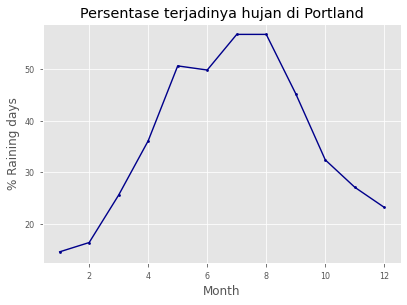

In [28]:
# Extract `Year` and 'Month' information from Date
df1_month = pd.crosstab(index=pd.DatetimeIndex(df1['Date']).month, columns=df1['RainTomorrow'], margins=True)
df1_month['%Yes'] = (df1_month['Yes'] / df1_month['All']).round(3)*100 
df1_month.iloc[:-1,-1].plot(style='.-',color='darkblue')
plt.xlabel('Month')
plt.ylabel('% Raining days')
plt.title('Persentase terjadinya hujan di Portland')

Bulan 7 dan 8 adalah bulan dengan curah hujan tertinggi sepanjang tahun

***

### <font color=#6C88C4> RainToday and RainTomorrow

1. Filter Data RainTomorrow

In [29]:
no = df1[(df1['RainTomorrow']=='No')]
no

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
74981,2009-01-02,8.6,15.2,1.6,4.800000,11.700000,39.0,20.0,17.0,60.0,61.0,1020.0,1021.3,6.000000,2.000000,11.9,14.0,Yes,No
74982,2009-01-03,1.6,18.0,0.2,4.600000,11.900000,30.0,9.0,15.0,67.0,52.0,1020.4,1018.3,6.000000,3.000000,11.6,17.5,No,No
74983,2009-01-04,4.8,20.1,0.0,4.800000,13.800000,28.0,11.0,17.0,73.0,63.0,1016.4,1015.2,1.000000,1.000000,14.7,18.1,No,No
74984,2009-01-05,4.4,18.8,0.0,5.600000,13.600000,46.0,20.0,31.0,72.0,68.0,1014.0,1013.4,4.000000,3.000000,14.9,18.0,No,No
74986,2009-01-07,12.8,18.6,1.4,4.800000,8.000000,50.0,9.0,28.0,88.0,57.0,1011.5,1012.8,8.000000,6.000000,14.6,17.9,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77978,2017-06-15,9.0,17.1,0.0,3.431257,6.537676,30.0,13.0,20.0,87.0,68.0,1025.9,1024.3,8.000000,6.075073,10.3,16.3,No,No
77979,2017-06-16,5.1,17.1,0.2,3.431257,6.537676,22.0,13.0,15.0,93.0,56.0,1025.5,1023.2,6.329104,6.075073,7.8,16.2,No,No
77982,2017-06-19,9.7,16.0,3.6,3.431257,6.537676,35.0,17.0,20.0,94.0,69.0,1030.8,1028.9,7.000000,1.000000,10.5,15.3,Yes,No
77984,2017-06-21,10.0,12.8,3.2,3.431257,6.537676,19.0,0.0,7.0,85.0,61.0,1028.9,1028.4,8.000000,8.000000,10.7,12.4,Yes,No


In [30]:
yes = df1[(df1['RainTomorrow']=='Yes')]
yes

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
74980,2009-01-01,12.5,16.6,0.0,4.800000,6.500000,59.0,28.0,28.0,97.0,99.0,1006.7,1010.5,6.329104,6.000000,13.7,14.5,No,Yes
75002,2009-01-23,8.1,23.3,0.2,6.600000,7.400000,57.0,15.0,31.0,75.0,50.0,1006.6,1003.1,7.000000,2.000000,12.8,21.4,No,Yes
75019,2009-02-09,12.1,17.9,0.0,5.200000,11.100000,35.0,17.0,22.0,53.0,44.0,1019.9,1019.7,5.000000,2.000000,14.0,16.6,No,Yes
75040,2009-03-02,7.9,22.5,0.0,3.800000,9.000000,41.0,11.0,17.0,77.0,43.0,1015.4,1011.4,3.000000,1.000000,14.4,21.8,No,Yes
75041,2009-03-03,14.3,29.0,1.6,8.000000,1.900000,72.0,24.0,41.0,67.0,97.0,1000.5,1000.8,8.000000,8.000000,21.9,16.2,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77981,2017-06-18,8.6,15.8,2.0,3.431257,6.537676,20.0,2.0,7.0,93.0,90.0,1029.7,1029.1,8.000000,8.000000,11.1,13.1,Yes,Yes
77983,2017-06-20,7.7,16.1,0.0,3.431257,6.537676,48.0,30.0,26.0,81.0,67.0,1025.2,1023.0,6.329104,6.075073,10.6,15.2,No,Yes
77986,2017-06-23,5.5,14.9,0.0,3.431257,6.537676,48.0,17.0,31.0,83.0,58.0,1015.7,1013.1,6.000000,1.000000,8.3,14.5,No,Yes
77987,2017-06-24,5.0,11.8,2.6,3.431257,6.537676,31.0,7.0,17.0,75.0,85.0,1019.3,1017.7,6.329104,6.000000,8.0,9.5,Yes,Yes


2. Visualisasi data RainTomorrow = Yes

Text(0.5, 1.0, 'Proporsi RainToday ketika RainTomorrow = Yes')

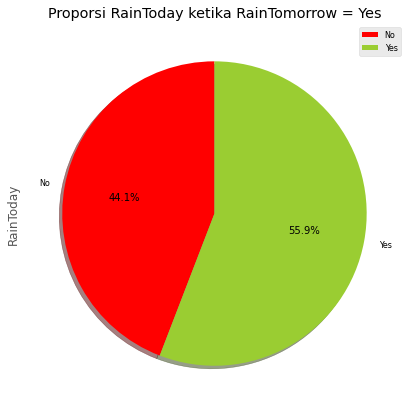

In [31]:
yes.groupby(['RainToday'],as_index=True).agg({'RainToday':'count'}, index=False).plot(kind='pie',figsize=(15, 7),autopct='%1.1f%%',startangle=90,shadow=True,subplots=True,colors= ['red','yellowgreen'])
plt.title('Proporsi RainToday ketika RainTomorrow = Yes')

3. Visualisasi data RainTomorrow = No

Text(0.5, 1.0, 'Proporsi RainToday ketika RainTomorrow = No')

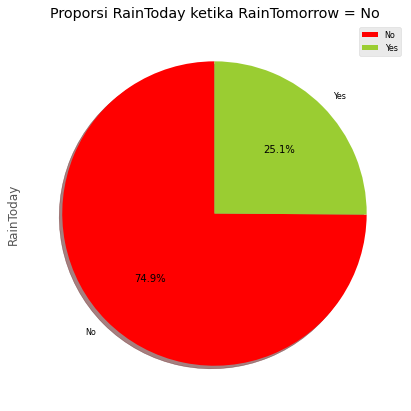

In [32]:
no.groupby(['RainToday'],as_index=True).agg({'RainToday':'count'}, index=False).plot(kind='pie',figsize=(15, 7),autopct='%1.1f%%',startangle=90,shadow=True,subplots=True,colors= ['red','yellowgreen'])
plt.title('Proporsi RainToday ketika RainTomorrow = No')

**Ketika RainTomorrow=Yes, mayoritas RainToday=Yes juga, sebaliknya ketika RainTomorrow=No mayoritas RainToday=No juga. Artinya, kejadian terjadinya hujan atau tidak pada hari ini cukup berpengaruh pada kejadian hujan pada esok hari.**

## <font color=#FF7913> F. Data Preprocessing

### <font color=#6C88C4> Encode Data

1. Menentukan kolom kategorikal yang akan di-encode

In [33]:
cat_col = df1.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)

['RainToday', 'RainTomorrow']


Kolom yang akan diencode adalah RainTomorrow

2. Encode kolom kategorikal menggunakan LabelEncoder

In [34]:
le = preprocessing.LabelEncoder()
df1['RainTomorrow_dummy']= le.fit_transform(df1['RainTomorrow'])

3. Preview df1 setelah encode data

Kolom Date dan RainToday tidak akan digunakan dalam permodelan Logistic Regression karena tipe datanya berupa kategorikal bukan numerik (RainToday) dan tipe data datetime (Date).

In [35]:
df1.drop(['Date', 'RainToday', 'RainTomorrow'], axis=1,inplace=True)
df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_dummy
74980,12.5,16.6,0.0,4.8,6.5,59.0,28.0,28.0,97.0,99.0,1006.7,1010.5,6.329104,6.0,13.7,14.5,1
74981,8.6,15.2,1.6,4.8,11.7,39.0,20.0,17.0,60.0,61.0,1020.0,1021.3,6.000000,2.0,11.9,14.0,0
74982,1.6,18.0,0.2,4.6,11.9,30.0,9.0,15.0,67.0,52.0,1020.4,1018.3,6.000000,3.0,11.6,17.5,0
74983,4.8,20.1,0.0,4.8,13.8,28.0,11.0,17.0,73.0,63.0,1016.4,1015.2,1.000000,1.0,14.7,18.1,0
74984,4.4,18.8,0.0,5.6,13.6,46.0,20.0,31.0,72.0,68.0,1014.0,1013.4,4.000000,3.0,14.9,18.0,0


### <font color=#6C88C4> Split Data

Data yang akan digunakan untuk training adalah sebesar 75%, sedangkan 25% sisanya digunakan untuk testing

In [36]:
train, test = train_test_split(df1, test_size=0.25, random_state=2)
train_index = train.index
test_index = test.index

In [37]:
x_train = train.drop(['RainTomorrow_dummy'],axis=1)
y_train = train[['RainTomorrow_dummy']]

In [38]:
x_test = test.drop(['RainTomorrow_dummy'],axis=1)
y_test = test[['RainTomorrow_dummy']]

### <font color=#6C88C4> Scale Data

Proses standardization terhadap data train dan testing agar mean = 0 dan standar deviasi = 1

In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [40]:
x_test = scaler.transform(x_test)

## <font color='Maroon'> Logistic Regression

### <font color=#FF7913> 1. Pendefinisian dan Pelatihan Model

#### <font color=#6C88C4> Create and Fit Model

**Training Data**

In [41]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [42]:
model.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

### <font color=#FF7913> 2. Evaluasi Model

#### <font color=#6C88C4> Get Results

In [43]:
print(model.intercept_)
print(model.coef_)

[-0.79649504]
[[-0.22126569 -0.22205188  0.0887837  -0.13514613 -0.40073314  0.97290072
  -0.13504281  0.0702883   0.04140923  0.63157489  0.81392063 -1.54892976
  -0.0488563   0.15496386 -0.0797077  -0.00538237]]


In [44]:
model.score(x_train,y_train)

0.8013856812933026

Tingkat akurasi dengan data training dari model di atas adalah **80,14%**. Karena model score yang sudah cukup tinggi seperti ini, diputuskan untuk tidak memeriksa korelasi antar variabel lagi

#### <font color='cornflowerblue'>Confusion Matrix

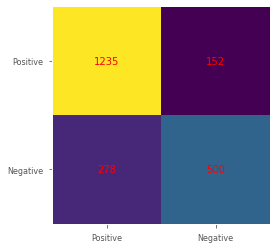

In [45]:
cm = confusion_matrix(y_train, model.predict(x_train))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Confusion matrix di atas menunjukkan bahwa True Positive (1235) > False Positive (152) dan False Negative (278) < True Negative (500).

#### <font color=#6C88C4> Predict Response Training Data

Memprediksi data training menggunakan model regresi yang sudah ada

In [47]:
y_pred = model.predict(x_train)
train['Estimated RainTomorrow'] = np.round(y_pred,2)
train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_dummy,Estimated RainTomorrow
77067,7.8,18.5,6.8,3.400000,12.300000,39.0,17.0,22.0,59.0,50.0,1009.6,1008.6,2.0,6.075073,15.1,17.4,0,0
75627,6.4,21.3,0.2,2.400000,10.100000,31.0,17.0,17.0,90.0,52.0,1028.2,1024.8,7.0,0.000000,10.6,20.0,0,0
77705,7.8,12.7,8.4,3.431257,6.537676,39.0,20.0,22.0,69.0,80.0,1010.6,1012.3,8.0,8.000000,11.3,11.1,0,1
75792,13.8,17.2,9.0,0.600000,3.200000,54.0,26.0,26.0,96.0,87.0,1006.2,1009.1,8.0,8.000000,14.2,15.4,1,1
75173,7.3,11.3,12.4,0.800000,4.700000,39.0,13.0,17.0,100.0,85.0,1002.7,1001.5,7.0,1.000000,8.2,10.7,1,1


In [48]:
total = train['Sunshine'].count()
total_correct = train['Sunshine'][train['RainTomorrow_dummy']==train['Estimated RainTomorrow']].count()
total_wrong = train['Sunshine'][train['RainTomorrow_dummy']!=train['Estimated RainTomorrow']].count()
print('Terdapat total correct prediction', total_correct, 'of',total)
print('Terdapat total wrong prediction',total_wrong, 'of',total)

Terdapat total correct prediction 1735 of 2165
Terdapat total wrong prediction 430 of 2165


Kolom "Estimated RainTomorrow" merupakan hasil prediksi dari model regresi yang ada

### <font color=#FF7913> 3. Model Inference

**Training Data**

#### <font color=#6C88C4> Predict Response Testing Data

Memprediksi testing data menggunakan model regresi yang sudah ada

In [49]:
y_pred = model.predict(x_test)
test['Estimated RainTomorrow'] = np.round(y_pred,2)
test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_dummy,Estimated RainTomorrow
76968,12.4,17.2,2.8,5.400000,9.100000,72.0,28.0,26.0,78.0,69.0,1002.7,1001.4,2.000000,6.075073,13.4,16.7,0,1
76889,9.4,14.3,4.6,0.000000,0.900000,61.0,11.0,20.0,99.0,78.0,1019.6,1013.7,3.000000,6.075073,10.1,13.3,1,1
75153,8.2,14.8,10.0,1.400000,5.100000,30.0,9.0,19.0,91.0,62.0,1012.6,1010.5,3.000000,7.000000,9.8,12.3,0,0
75897,6.6,14.3,0.4,1.100000,7.800000,31.0,17.0,9.0,97.0,67.0,1016.1,1013.7,8.000000,8.000000,9.7,13.2,1,0
77748,3.5,15.9,0.0,3.431257,6.537676,26.0,13.0,13.0,78.0,54.0,1020.4,1019.3,7.000000,6.075073,9.4,14.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77033,10.6,31.6,0.0,6.000000,2.800000,24.0,13.0,13.0,76.0,26.0,1013.1,1008.9,4.000000,8.000000,15.5,29.3,0,0
76803,14.7,18.7,0.0,2.600000,1.100000,17.0,11.0,7.0,99.0,86.0,1017.4,1016.8,7.000000,8.000000,14.9,17.1,0,0
75356,21.1,22.3,0.6,13.000000,0.200000,52.0,26.0,20.0,90.0,69.0,1003.1,1010.5,8.000000,8.000000,22.3,16.9,1,0
76696,11.1,17.1,2.2,4.000000,10.200000,65.0,30.0,28.0,94.0,71.0,1008.9,1011.5,8.000000,7.000000,13.2,16.2,0,1


In [50]:
model.score(x_test,y_test)

0.8033240997229917

**Tingkat akurasi dengan data testing dari model di atas adalah 80,33%**

#### <font color='cornflowerblue'>Confusion Matrix

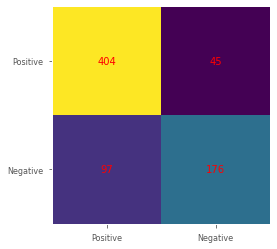

In [51]:
cm = confusion_matrix(y_test, model.predict(x_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Confusion matrix di atas menunjukkan bahwa True Positive (404) > False Positive (45) dan False Negative (97) < True Negative (176)

#### <font color=#6C88C4>Comparison between Testing Data and Training Data

In [52]:
compare = pd.DataFrame({'Data':['Training Data','Testing Data'],'Tingkat Akurasi':[model.score(x_train,y_train), model.score(x_test, y_test)]})
compare

,Data,Tingkat Akurasi
0,Training Data,0.801386
1,Testing Data,0.803324


**Tingkat akurasi pada training data dan testing data tidak berbeda jauh/ signifikan. Akurasi pada testing data (80.33%) lebih tinggi 0.18% dibandingkan training data (80.14%)**

## <font color='Maroon'> Support Vector Machine

In [53]:
#Dropping Kolom Estimated RainTomorrow from train and test dataset
train.drop(['Estimated RainTomorrow'],axis=1,inplace=True)
test.drop(['Estimated RainTomorrow'],axis=1,inplace=True)

### <font color=#FF7913> 1. Pendefinisian dan Pelatihan Model

#### <font color=#6C88C4> Create and Fit Model

In [54]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

Fitting model SVM menggunakan data training

### <font color=#FF7913> 2. Evaluasi Model

#### <font color=#6C88C4> Get Results

In [55]:
y_predc =clf.predict(x_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_predc))

Accuracy: 0.7950138504155124


In [57]:
test['Estimated RainTomorrow'] = y_predc
test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_dummy,Estimated RainTomorrow
76968,12.4,17.2,2.8,5.400000,9.100000,72.0,28.0,26.0,78.0,69.0,1002.7,1001.4,2.0,6.075073,13.4,16.7,0,1
76889,9.4,14.3,4.6,0.000000,0.900000,61.0,11.0,20.0,99.0,78.0,1019.6,1013.7,3.0,6.075073,10.1,13.3,1,1
75153,8.2,14.8,10.0,1.400000,5.100000,30.0,9.0,19.0,91.0,62.0,1012.6,1010.5,3.0,7.000000,9.8,12.3,0,0
75897,6.6,14.3,0.4,1.100000,7.800000,31.0,17.0,9.0,97.0,67.0,1016.1,1013.7,8.0,8.000000,9.7,13.2,1,0
77748,3.5,15.9,0.0,3.431257,6.537676,26.0,13.0,13.0,78.0,54.0,1020.4,1019.3,7.0,6.075073,9.4,14.9,0,0


Kolom "Estimated RainTomorrow" merupakan hasil estimasi dari model ini. <BR>
**Tingkat akurasi pada model ini adalah 79.50%**

### <font color=#FF7913> 3. Model Inference

**Testing Data**

#### <font color=#6C88C4> Predict Response Testing Data

Memprediksi testing data menggunakan model regresi yang sudah ada

In [58]:
y_predc1 =clf.predict(x_test)
test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_dummy,Estimated RainTomorrow
76968,12.4,17.2,2.8,5.400000,9.100000,72.0,28.0,26.0,78.0,69.0,1002.7,1001.4,2.000000,6.075073,13.4,16.7,0,1
76889,9.4,14.3,4.6,0.000000,0.900000,61.0,11.0,20.0,99.0,78.0,1019.6,1013.7,3.000000,6.075073,10.1,13.3,1,1
75153,8.2,14.8,10.0,1.400000,5.100000,30.0,9.0,19.0,91.0,62.0,1012.6,1010.5,3.000000,7.000000,9.8,12.3,0,0
75897,6.6,14.3,0.4,1.100000,7.800000,31.0,17.0,9.0,97.0,67.0,1016.1,1013.7,8.000000,8.000000,9.7,13.2,1,0
77748,3.5,15.9,0.0,3.431257,6.537676,26.0,13.0,13.0,78.0,54.0,1020.4,1019.3,7.000000,6.075073,9.4,14.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77033,10.6,31.6,0.0,6.000000,2.800000,24.0,13.0,13.0,76.0,26.0,1013.1,1008.9,4.000000,8.000000,15.5,29.3,0,0
76803,14.7,18.7,0.0,2.600000,1.100000,17.0,11.0,7.0,99.0,86.0,1017.4,1016.8,7.000000,8.000000,14.9,17.1,0,0
75356,21.1,22.3,0.6,13.000000,0.200000,52.0,26.0,20.0,90.0,69.0,1003.1,1010.5,8.000000,8.000000,22.3,16.9,1,0
76696,11.1,17.1,2.2,4.000000,10.200000,65.0,30.0,28.0,94.0,71.0,1008.9,1011.5,8.000000,7.000000,13.2,16.2,0,1


In [59]:
print('Accuracy:', metrics.accuracy_score(y_test, y_predc1))

Accuracy: 0.7950138504155124


Tingkat akurasi dengan data testing dari model di atas adalah **79,50%**

#### <font color='cornflowerblue'>Confusion Matrix

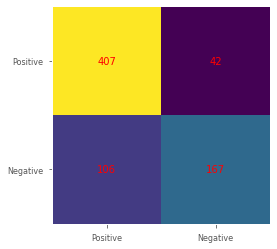

In [62]:
cm = confusion_matrix(y_test, y_predc)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Confusion matrix di atas menunjukkan bahwa True Positive (407) > False Positive (42) dan False Negative (106) < True Negative (167)

##  <font color='maroon'>Models Comparing

In [64]:
models_comparing = pd.DataFrame({'Model':['Logistic Regression','Support Vector Machine'],
                               'Tingkat Akurasi':[model.score(x_test, y_test), metrics.accuracy_score(y_test, y_predc)]})
models_comparing

,Model,Tingkat Akurasi
0,Logistic Regression,0.803324
1,Support Vector Machine,0.795014


**Tingkat akurasi pada model "Logistic Regression" (80.33%) lebih besar dibandingkan "Support Vector Machine" (79.50%). Oleh karena itu, model Logistic Regression lebih baik untuk digunakan dalam memprediksi apakah besok hujan atau tidak di Portland**

## <font color=#FF7913> G. Pengambilan Kesimpulan

1. Location dengan jumlah RainTomorrow terbanyak adalah Portland, karena itu data yang akan digunakan untuk analisis selanjutnya adalah data di Portland saja.
2. Curah hujan tertinggi di Portland terjadi di bulan 7 dan 8 sepanjang tahun.
3. Ketika RainTomorrow=Yes, mayoritas RainToday=Yes juga, sebaliknya ketika RainTomorrow=No mayoritas RainToday=No juga. Artinya, kejadian terjadinya hujan atau tidak pada hari ini cukup berpengaruh pada kejadian hujan pada esok hari.
4. Tingkat akurasi pada model "Logistic Regression" (80.33%) lebih besar dibandingkan "Support Vector Machine" (79.50%). Oleh karena itu, model Logistic Regression lebih baik untuk digunakan dalam memprediksi apakah besok hujan atau tidak di Portland.